In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
%matplotlib inline

In [72]:
df=load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [73]:
%store df

Stored 'df' (DataFrame)


In [74]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='survived', ylabel='count'>

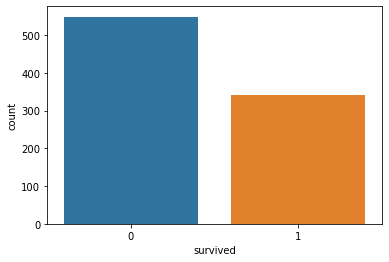

In [75]:
# countplot of survived vs not survived
sns.countplot(x='survived',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

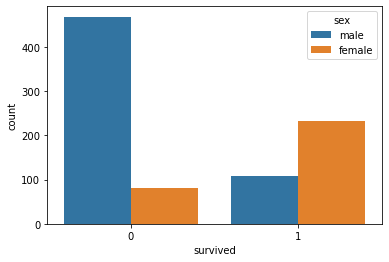

In [76]:
# how many males or females survived or did not
sns.countplot(x='survived',data=df,hue='sex')

In [77]:
# check for null valus
df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
# how many values are null
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

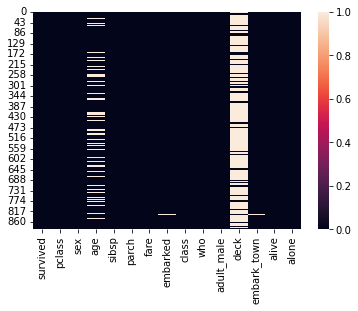

In [79]:
# visualize null values 
sns.heatmap(df.isna())

In [80]:
# % of null values in age column
(df['age'].isna().sum()/len(df['age']))*100

19.865319865319865

In [81]:
# % of null values in cabin column
(df['deck'].isna().sum()/len(df['deck']))*100

77.21661054994388

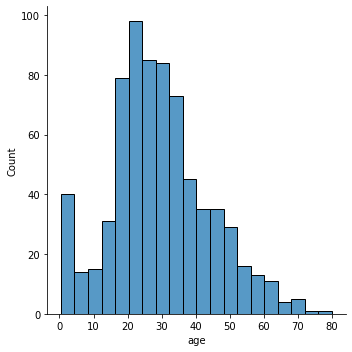

In [82]:
# distribution for age
sns.displot(x='age',data=df)

In [83]:
# fill age column use the mean
df['age'].fillna(df['age'].mean(),inplace=True)

In [84]:
# verify that the age is not null
df['age'].isna().sum()

0

<AxesSubplot:>

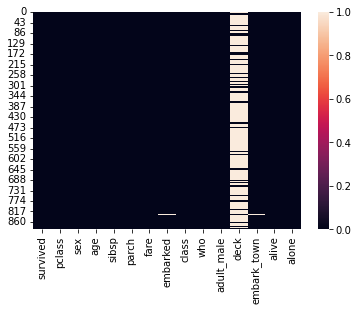

In [85]:
sns.heatmap(df.isna())

In [86]:
df.drop('deck',axis=1,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [88]:
# convert categorical values to numeric values
gender=pd.get_dummies(df['sex'],drop_first=True)
alone=pd.get_dummies(df['alone'],drop_first=True)
adult_male=pd.get_dummies(df['adult_male'],drop_first=True)
alive=pd.get_dummies(df['alive'],drop_first=True)

In [89]:
# add new columns
df['gender']=gender
df['alone']=alone
df['adult_male']=adult_male
df['alive']=alive

In [90]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'gender'],
      dtype='object')

In [91]:
# drop columns not needed
df.drop(['sex','class','embarked','who','embark_town'],axis=1,inplace=True)
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alive,alone,gender
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,1,0,0
4,0,3,35.000000,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1,1
887,1,1,19.000000,0,0,30.0000,0,1,1,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0
889,1,1,26.000000,0,0,30.0000,1,1,1,1


In [92]:
%store df

Stored 'df' (DataFrame)


In [93]:
# separate the X-axis, Y-axis
X = df.iloc[:,1:10]
X

,pclass,age,sibsp,parch,fare,adult_male,alive,alone,gender
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,1,1,0
3,1,35.000000,1,0,53.1000,0,1,0,0
4,3,35.000000,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1,1
887,1,19.000000,0,0,30.0000,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,0,0
889,1,26.000000,0,0,30.0000,1,1,1,1


In [94]:
%store X

Stored 'X' (DataFrame)


In [95]:
Y=df.iloc[:,0]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [96]:
%store Y

Stored 'Y' (Series)


In [97]:
# convert X to numpy arrahy
X=X.values
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 3.         22.          1.         ...  0.          0.
   1.        ]
 [ 1.         38.          1.         ...  1.          0.
   0.        ]
 [ 3.         26.          0.         ...  1.          1.
   0.        ]
 ...
 [ 3.         29.69911765  1.         ...  0.          0.
   0.        ]
 [ 1.         26.          0.         ...  1.          1.
   1.        ]
 [ 3.         32.          0.         ...  0.          1.
   1.        ]]


In [98]:
# convert Y to a numpy array
Y=Y.values
print(Y)
print(type(Y))

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [99]:
X.shape

(891, 9)

In [100]:
Y.shape

(891,)

In [101]:
# X=X.T
# X.shape

In [102]:
# Y=(Y.reshape(1,X.shape[1]))
# Y.shape

In [103]:
# split the dataset into training set and testing set
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.15, random_state = 1)

In [104]:
# print(XTrain)
print(XTrain.shape)

(757, 9)


In [105]:
XTrain=XTrain.T
print(XTrain.shape)

(9, 757)


In [106]:
XTest=XTest.T
print(XTest.shape)

(9, 134)


In [107]:
YTrain=YTrain.reshape(1,XTrain.shape[1])
print(YTrain.shape)

(1, 757)


In [108]:
YTest=YTest.reshape(1,XTest.shape[1])
print(YTest.shape)

(1, 134)


In [109]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [110]:
def model(X,Y,learningrate,iterations):
    m=XTrain.shape[1]
    n=XTrain.shape[0]
    W=np.zeros((n,1))
    B=0
    cost_list=[]
    for i in range(iterations):
        Z=np.dot(W.T, X)+B
        A=sigmoid(Z)
        
        cost =-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        dW=(1/m)*np.dot(A-Y,X.T)
        dB=(1/m)*np.sum(A-Y)
        
        W = W-learningrate*dW.T
        B=B-learningrate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10)==0):
            print("The cost after",i,"iteration is:",cost)
        
    return W,B,cost_list

In [111]:
iterations=100000
learningrate=0.00095
W,B,cost_list = model(XTrain,YTrain,learningrate=learningrate,iterations=iterations)

The cost after 0 iteration is: 0.6931471805599453
The cost after 10000 iteration is: 0.27791629154408376
The cost after 20000 iteration is: 0.1801030487787532
The cost after 30000 iteration is: 0.13265255772669596
The cost after 40000 iteration is: 0.10455925436048123
The cost after 50000 iteration is: 0.08604778101828939
The cost after 60000 iteration is: 0.07297721832794071
The cost after 70000 iteration is: 0.06328308573129819
The cost after 80000 iteration is: 0.05582177534371513
The cost after 90000 iteration is: 0.04991011686506083


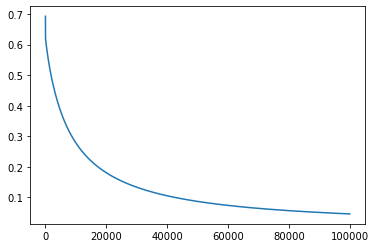

In [112]:
plt.plot(np.arange(iterations),cost_list)

In [113]:
# find accuracy
def accuracy(X,Y,W,B):
    Z = np.dot(W.T, X)+B
    A=sigmoid(Z)
    A=A>0.5
    A=np.array(A, dtype='int64')
    acc=(1-np.sum(np.absolute(A-Y))/Y.shape[1])*100
    print('The accuracy of the model is :',acc,'%')

In [114]:
accuracy(XTest,YTest,W,B)

The accuracy of the model is : 100.0 %
